# ANLY 590 Assignment 0
## Mengci Duan

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Hitters = pd.read_csv("Hitters.csv",index_col = 0)

In [137]:
#We begin with checking the dataset
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [58]:
#Drop the NAs. 
Hitters = Hitters.dropna()
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [59]:
#Find out categorical variables. 
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [60]:
X = Hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
#We check again the dataset to ensure the categorical variables were omitted. 
X.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 16 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
HmRun      263 non-null int64
Runs       263 non-null int64
RBI        263 non-null int64
Walks      263 non-null int64
Years      263 non-null int64
CAtBat     263 non-null int64
CHits      263 non-null int64
CHmRun     263 non-null int64
CRuns      263 non-null int64
CRBI       263 non-null int64
CWalks     263 non-null int64
PutOuts    263 non-null int64
Assists    263 non-null int64
Errors     263 non-null int64
dtypes: int64(16)
memory usage: 34.9+ KB


#### Part 1 Lasso Regression
1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 
1.1.1. Create a visualization of the coefficient trajectories

In [221]:
from sklearn.linear_model import Lasso, LassoCV,Ridge, RidgeCV

y = Hitters.Salary  
lasso_reg = Lasso(max_iter=10000, normalize = True)

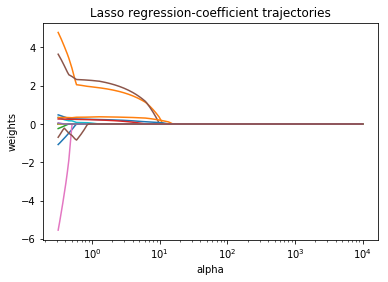

In [223]:
alphas = np.logspace(4, -0.5, 200)

coefs = []

for a in alphas:
    lasso_reg.set_params(alpha=a)
    lasso_reg.fit(X, y)
    coefs.append(lasso_reg.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso regression-coefficient trajectories')
plt.axis('tight')
plt.show()

1.1.2. Comment on which are the final three predictors that remain in the model
1.1.3. Use cross-validation to find the optimal value of the regularization penalty
1.1.4. How many predictors are left in that model?

In [224]:
for lamb in coefs:
    while sum(lamb!=0) ==3:
        print(X.columns[lamb!= 0])
        break

Index(['Hits', 'CRuns', 'CRBI'], dtype='object')
Index(['Hits', 'CRuns', 'CRBI'], dtype='object')


Thus we find out that the final three predictors that remain in the model are "Hits", "CRuns" and "CRBI". 

In [225]:
from sklearn import cross_validation
X_train, X_test , y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=1)

In [226]:
lassocv = LassoCV(cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
print("Optimal value of the regularization penalty:", lassocv.alpha_)

lasso_reg.set_params(alpha=lassocv.alpha_)
lasso_reg.fit(X, y)

pd.Series(lasso_reg.coef_, index=X.columns)

Optimal value of the regularization penalty: 2.24102067695


AtBat      0.000000
Hits       1.745491
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      2.030306
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.210222
CRBI       0.364559
CWalks     0.000000
PutOuts    0.170729
Assists   -0.000000
Errors    -0.000000
dtype: float64

Five predictors are left in that lasso model: "Hits", "Walks", "CRuns", "CRBI" and "PutOuts"

#### Part 2 Ridge Regression

1.2 Repeat with Ridge Regression. 
1.2.1 Visualize the coefficient trajectories
1.2.2 Use cross-validation to find the optimal value of the regularization penalty

In [228]:
from sklearn import linear_model

ridge_reg = Ridge(max_iter = 100000, normalize = True)
coefs2 = []

for a in alphas:
    ridge_reg.set_params(alpha=a)
    ridge_reg.fit(X, y)
    coefs2.append(ridge_reg.coef_)
    
np.shape(coefs2)

(200, 16)

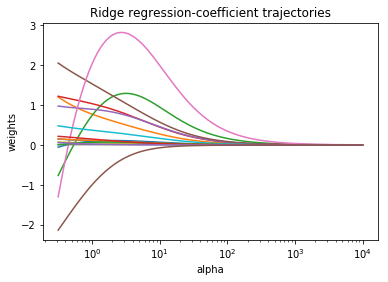

In [231]:
ax2 = plt.gca()
ax2.plot(alphas, coefs2)
ax2.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge regression-coefficient trajectories')
plt.axis('tight')
plt.show()

In [232]:
ridgecv = RidgeCV(cv = 10)
ridgecv.fit(X_train, y_train)
print("Optimal value of the regularization penalty:", ridgecv.alpha_)

ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X, y)

pd.Series(ridge.coef_, index=X.columns)

Optimal value of the regularization penalty: 10.0


AtBat      0.069921
Hits       0.274156
HmRun      0.951045
Runs       0.449675
RBI        0.457258
Walks      0.572804
Years      1.998412
CAtBat     0.005877
CHits      0.022242
CHmRun     0.166005
CRuns      0.044649
CRBI       0.046078
CWalks     0.046315
PutOuts    0.035902
Assists    0.005472
Errors    -0.070350
dtype: float64

2 Short Answer. 
2.1 Explain in your own words the bias-variance tradeoff

During the process of model construction, people have to decide whether they want to choose high-flexibilty model or low-flexibility model. High-flexibility model will have low bias but high variance because the model depends a lot on the training dataset. In contrast, low-flexibility model will have high bias but low variance because the model changes little with different training dataset, for instance, the least square regression line. In conclusion, bias would increase when the variance decreases. We need to find a balance point between the bias and the variance. 

2.2 What role does regularization play in this tradeoff? 

Sometimes, there are too many explanatory variables in the model and some variables may be useless and will likely lead to overfitting problem. Regularztion can help reduce number of variables in the model. Thus it will reduce variance of the model and at the same time increase bias. 

2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

Both ridge and lasso models use the penalty parameter to regularize the size of features. 
Lasso regularizes the size of features by minimizing the absolute sum of residuals. Coefficients will be reduced to zero when penalty parameter increases. And for ridge, coefficients will be reduced when parameter increaes. 
Thus increasing penalty parameter will lead to higher bias and lower variance. 